In [62]:
import numpy as np
import pandas as pd
import re
import sys
import os
import yaml

import glob 
import pickle
import matplotlib.pyplot as plt

import matplotlib

In [63]:
matplotlib.__version__

'3.9.2'

In [64]:
from utils import *

In [65]:
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["font.family"] = "Times New Roman"

In [66]:
def modify_plot(fig, label_size=20, title_size=22,
                capitalize_legend=False, remove_title=True,
                change_legend=False):
    agents=["StdTS", "StdTS: Linear", "StdTS: Contextual", "poGAMBITTS","foGAMBITTS","ens-poGAMBITTS"]
    for ax in fig.axes:
        # Axis title and labels
        ax.title.set_fontsize(title_size)
        ax.xaxis.label.set_fontsize(label_size)
        ax.yaxis.label.set_fontsize(label_size)
        if remove_title:
            ax.title.set_text("")
        # Axis tick labels
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontname("Times New Roman")
            label.set_fontsize(10)


        # Axis labels
        ax.xaxis.label.set_fontname("Times New Roman")
        ax.yaxis.label.set_fontname("Times New Roman")

        # Title
        ax.title.set_fontname("Times New Roman")

        # Legend (if any)
        legend = ax.get_legend()
        if legend:
            legend.set_title(legend.get_title().get_text(), prop={'family': 'Times New Roman'})
            for text in legend.get_texts():
                text.set_fontname("Times New Roman")
                text.set_fontsize(10)  # Legend entry text
                
                if capitalize_legend and text.get_text() not in agents:
                    text.set_text(text.get_text().capitalize())
                    
                if change_legend and text.get_text() in change_legend.keys():
                    text.set_text(change_legend[text.get_text()])
                    
                
                handles, _ = ax.get_legend_handles_labels()    
                for text, handle in zip(legend.get_texts(), handles):
                    handle.set_label(text.get_text())
                    
                legend.get_title().set_fontsize(12)
                                  
                    
                    
                    
                
            legend.get_title().set_fontsize(12) 
            
        
    # Optional: Adjust layout
    fig.tight_layout()
    
    return fig

def save_fig(fig, fig_name, fig_dir):
    fig.savefig(os.path.join(fig_dir, fig_name), dpi=300, bbox_inches='tight')
    plt.close(fig)

In [67]:
changing_legend = {
    "MAB": "StdTS",
    "LB": "StdTS:Linear",
    "CB": "StdTS:Contextual",
    "poNATS": "poGAMBITTS",
    "foNATS": "foGAMBITTS",
    "ens-poNATS": "ens-poGAMBITTS"
}

In [68]:
base_path = '../results/plots/main_body'


# Modify Linear Env Scaling Nprompts plots

In [69]:
pckl_folder = os.path.join(base_path,'nprompts_linear_env_sd_0')
png_folder = os.path.join(pckl_folder,'png')

In [70]:
if not os.path.exists(png_folder):
    os.makedirs(png_folder)

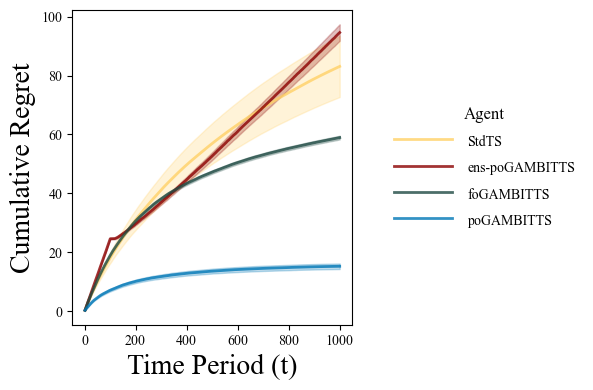

In [71]:
with open(os.path.join(pckl_folder,"linear_env_3prompts.pckl"), "rb") as f:
    fig = pickle.load(f)
    fig = modify_plot(fig) #, change_legend=changing_legend

In [72]:
for filepath in glob.glob(os.path.join(pckl_folder, "*.pckl")):
    print(f"Reading {filepath}")
    # Load the figure
    with open(filepath, "rb") as f:
        fig = pickle.load(f)
    fig = modify_plot(fig) # ,change_legend=changing_legend
    fig_name = os.path.basename(filepath).replace(".pckl", ".png")
    print(f"Saving modified image to {os.path.join(png_folder, fig_name)}")
    # Save the modified figure
    save_fig(fig, fig_name, png_folder)


Reading ../results/plots/main_body/nprompts_linear_env_sd_0/linear_env_30prompts.pckl
Saving modified image to ../results/plots/main_body/nprompts_linear_env_sd_0/png/linear_env_30prompts.png
Reading ../results/plots/main_body/nprompts_linear_env_sd_0/linear_env_40prompts.pckl
Saving modified image to ../results/plots/main_body/nprompts_linear_env_sd_0/png/linear_env_40prompts.png
Reading ../results/plots/main_body/nprompts_linear_env_sd_0/linear_env_3prompts_no_legend.pckl
Saving modified image to ../results/plots/main_body/nprompts_linear_env_sd_0/png/linear_env_3prompts_no_legend.png
Reading ../results/plots/main_body/nprompts_linear_env_sd_0/linear_env_3prompts.pckl
Saving modified image to ../results/plots/main_body/nprompts_linear_env_sd_0/png/linear_env_3prompts.png
Reading ../results/plots/main_body/nprompts_linear_env_sd_0/linear_env_5prompts.pckl
Saving modified image to ../results/plots/main_body/nprompts_linear_env_sd_0/png/linear_env_5prompts.png
Reading ../results/plots/m

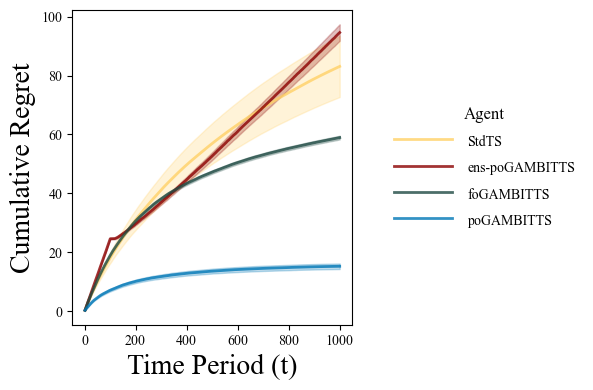

In [73]:
with open(os.path.join(pckl_folder,"linear_env_3prompts.pckl"), "rb") as f:
    fig = pickle.load(f)
    fig = modify_plot(fig) #, change_legend=changing_legend

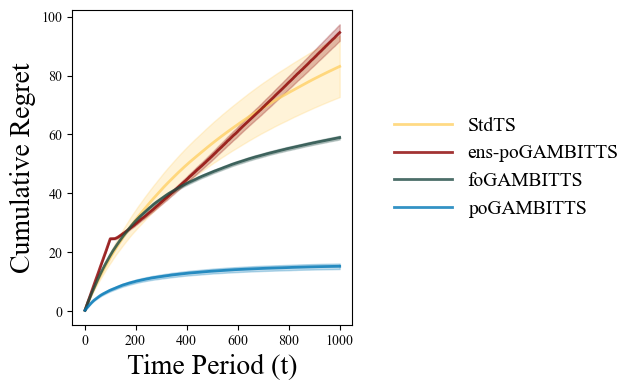

In [74]:
fig.axes[0].legend(
        loc='center left',
        bbox_to_anchor=(1.05, 0.5),
        fontsize=14,
        title_fontsize=16,
        frameon=False,
        markerscale=2.0,
        handlelength=3.0,
        borderaxespad=1.0
    )
fig

In [75]:
save_fig(fig, "linear_env_3prompts.png", png_folder)

In [76]:
ax = fig.axes[0]

handles, labels = ax.get_legend_handles_labels()

    # Create new figure just for the legend
fig_legend = plt.figure(figsize=(4, 2))  # Adjust size as needed
fig_legend.legend(
    handles,
    labels,
    loc="center",
    frameon=False,
    fontsize=14, 
    title_fontsize=16, 
    ncol=1
)
fig_legend.savefig(os.path.join(png_folder,"linear_env_3prompts_legend_only.pdf"), bbox_inches='tight', transparent=True)

<Figure size 400x200 with 0 Axes>

# Modify Correctly Specified Linear 1D setting 

In [77]:
pckl_folder = os.path.join(base_path,'1d_experiment_optimism')
png_folder = os.path.join(pckl_folder,'png')
pckl_folder,png_folder

('../results/plots/main_body/1d_experiment_optimism',
 '../results/plots/main_body/1d_experiment_optimism/png')

In [78]:
if not os.path.exists(png_folder):
    os.makedirs(png_folder)

In [79]:
for filepath in glob.glob(os.path.join(pckl_folder, "*.pckl")):
    print(f"Reading {filepath}")
    # Load the figure
    with open(filepath, "rb") as f:
        fig = pickle.load(f)
    fig = modify_plot(fig) #, change_legend=changing_legend
    fig_name = os.path.basename(filepath).replace(".pckl", ".png")
    print(f"Saving modified image to {os.path.join(png_folder, fig_name)}")
    # Save the modified figure
    save_fig(fig, fig_name, png_folder)

Reading ../results/plots/main_body/1d_experiment_optimism/1d_correct_model_no_legebd.pckl
Saving modified image to ../results/plots/main_body/1d_experiment_optimism/png/1d_correct_model_no_legebd.png
Reading ../results/plots/main_body/1d_experiment_optimism/1d_correct_model.pckl
Saving modified image to ../results/plots/main_body/1d_experiment_optimism/png/1d_correct_model.png


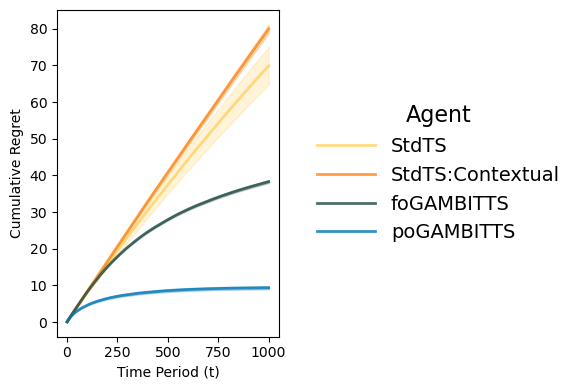

In [80]:
with open(os.path.join(pckl_folder,"1d_correct_model.pckl"), "rb") as f:
        fig = pickle.load(f)


In [81]:
fig = modify_plot(fig)

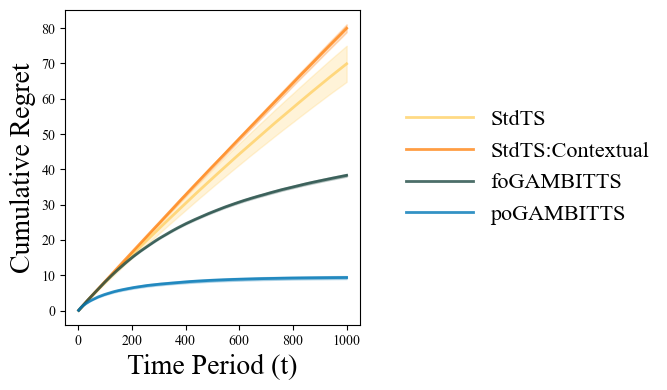

In [82]:
fig.axes[0].legend(
        loc='center left',
        bbox_to_anchor=(1.05, 0.5),
        fontsize=16,
        title_fontsize=18,
        frameon=False,
        markerscale=2.0,
        handlelength=3.0,
        borderaxespad=1.0
    )
fig


In [83]:
ax = fig.axes[0]

handles, labels = ax.get_legend_handles_labels()

    # Create new figure just for the legend
fig_legend = plt.figure(figsize=(4, 2))  # Adjust size as needed
fig_legend.legend(
    handles,
    labels,
    loc="center",
    frameon=False,
    fontsize=14, 
    title_fontsize=16, 
    ncol=1
)


<Figure size 400x200 with 0 Axes>

In [84]:
fig_legend.savefig(os.path.join(png_folder,"1d_correct_model_legend_only.pdf"), bbox_inches='tight', transparent=True)

# Modify Missspecified Linear 1D setting 

In [85]:
pckl_folder = os.path.join(base_path,'1d_experiment_linear_sd_0')
png_folder = os.path.join(pckl_folder,'png')
pckl_folder,png_folder

('../results/plots/main_body/1d_experiment_linear_sd_0',
 '../results/plots/main_body/1d_experiment_linear_sd_0/png')

In [86]:
if not os.path.exists(png_folder):
    os.makedirs(png_folder)

In [87]:
for filepath in glob.glob(os.path.join(pckl_folder, "*.pckl")):
    print(f"Reading {filepath}")
    # Load the figure
    with open(filepath, "rb") as f:
        fig = pickle.load(f)
    fig = modify_plot(fig,capitalize_legend=True, remove_title=True)
    fig_name = os.path.basename(filepath).replace(".pckl", ".png")
    print(f"Saving modified image to {os.path.join(png_folder, fig_name)}")
    # Save the modified figure
    save_fig(fig, fig_name, png_folder)

Reading ../results/plots/main_body/1d_experiment_linear_sd_0/ponats_1d_linear.pckl
Saving modified image to ../results/plots/main_body/1d_experiment_linear_sd_0/png/ponats_1d_linear.png
Reading ../results/plots/main_body/1d_experiment_linear_sd_0/fonats_1d_linear.pckl
Saving modified image to ../results/plots/main_body/1d_experiment_linear_sd_0/png/fonats_1d_linear.png
Reading ../results/plots/main_body/1d_experiment_linear_sd_0/1d_correct_model_no_legebd.pckl
Saving modified image to ../results/plots/main_body/1d_experiment_linear_sd_0/png/1d_correct_model_no_legebd.png
Reading ../results/plots/main_body/1d_experiment_linear_sd_0/1d_correct_model.pckl
Saving modified image to ../results/plots/main_body/1d_experiment_linear_sd_0/png/1d_correct_model.png
Reading ../results/plots/main_body/1d_experiment_linear_sd_0/ponats_1d_linear_no_legend.pckl
Saving modified image to ../results/plots/main_body/1d_experiment_linear_sd_0/png/ponats_1d_linear_no_legend.png


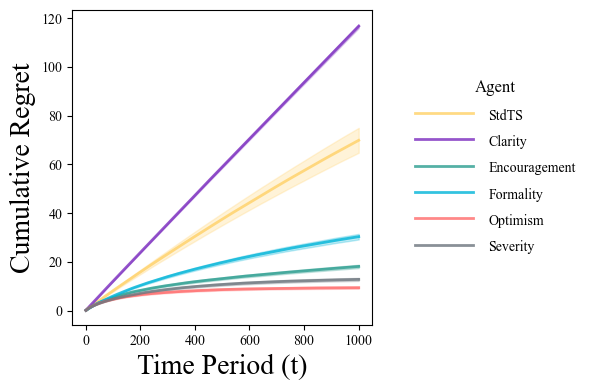

In [88]:
with open(os.path.join(pckl_folder,"ponats_1d_linear.pckl"), "rb") as f:
        fig = pickle.load(f)
        fig = modify_plot(fig,capitalize_legend=True, remove_title=True) # ,change_legend=changing_legend

In [89]:
fig.axes[0].legend(
        loc='center left',
        bbox_to_anchor=(1.05, 0.5),
        fontsize=14,
        title_fontsize=16,
        frameon=False,
        markerscale=2.0,
        handlelength=3.0,
        borderaxespad=1.0
    )

In [90]:
save_fig(fig, "ponats_1d_linear.png", png_folder)

In [91]:
ax = fig.axes[0]

handles, labels = ax.get_legend_handles_labels()

# Create new figure just for the legend
fig_legend = plt.figure(figsize=(4, 2))  # Adjust size as needed
fig_legend.legend(
    handles,
    labels,
    loc="center",
    frameon=False,
    fontsize=14, 
    title_fontsize=16, 
    ncol=1
)
fig_legend.savefig(os.path.join(png_folder,"ponats_1d_linear_legend_only.pdf"), bbox_inches='tight', transparent=True)

<Figure size 400x200 with 0 Axes>